<a href="https://colab.research.google.com/github/MyAppsTest/Data-Science-probando-relaciones-con-regresi-n-lineal/blob/main/precios_de_inmuebles_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Precificación inmobiliaria**

**Objetivo**: Estimar los precios de los inmuebles.
 * Identificar los aspectos que tienen más influencia en la precificación de los inmuebles.
 * Entender cuál de todos estos aspectos es el más relevante.
 * Precificar un inmueble nuevo.

Base de datos simplificada e inspirada en [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


- area_primer_piso: Se refiere al área del primer piso de la propiedad, medida en metros cuadrados.
- existe_segundo_piso: Esta variable es binaria, indicando si la propiedad tiene o no un segundo piso. Puede ser representada como 1 para "sí" y 0 para "no".
- area_segundo_piso: Si la propiedad tiene un segundo piso, esta variable representa el área total del segundo piso, medida en metros cuadrados.
- cantidad_baños: Indica el número total de baños en la propiedad.
-capacidad_coches_garaje: Esta variable indica la capacidad del garaje de la propiedad, es decir, el número máximo de coches que pueden estacionarse en el garaje.
- calidad_de_la_cocina_Excelente: Esta es una variable categórica que evalúa la calidad de la cocina en la propiedad. En este caso, se asume que si la cocina es considerada "Excelente" se representa por 1, y de lo contrario, por 0.
- precio_de_venta: Este es el precio de venta de la propiedad en reales. Es la variable objetivo que se intenta predecir utilizando los otros atributos de la propiedad.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
link = "/content/drive/MyDrive/Probando relaciones con regresion lineal/precios_casas.csv"

In [3]:
import pandas as pd

# 1. Ajustando una recta

## Conociendo los datos

In [4]:
#Leyendo los datos
datos = pd.read_csv(link)

In [5]:
datos.sample(10)

,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
1011,1029,89.9272,1,37.9032,1,240,0,517650.00
1037,1056,141.4867,0,0.0000,2,478,0,887400.00
722,737,96.6160,0,0.0000,2,400,0,460955.00
410,416,124.4860,0,0.0000,2,396,0,892990.62
1077,1096,122.0706,0,0.0000,2,440,0,869809.76
420,426,65.6803,1,63.3578,1,240,0,665550.00
1160,1179,76.1780,1,48.5867,1,186,0,763657.00
320,324,108.0427,0,0.0000,1,220,0,622042.75
252,255,122.0706,0,0.0000,1,294,0,714850.00
638,650,58.5270,0,0.0000,1,0,0,416585.00


In [6]:
#Cuáles factores fueron colectados
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1438 non-null   int64  
 1   area_primer_piso             1438 non-null   float64
 2   tiene_segundo_piso           1438 non-null   int64  
 3   area_segundo_piso            1438 non-null   float64
 4   cantidad_banos               1438 non-null   int64  
 5   capacidad_carros_garage      1438 non-null   int64  
 6   calidad_de_cocina_excelente  1438 non-null   int64  
 7   precio_de_venta              1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [7]:
#eliminar la columna Id, dado que no se utilizara.
datos = datos.drop(columns='Id')
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

## Correlación

**¿Cuáles factores están relacionados con el precio de la casa? ¿Cómo es esa relación?**

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.  
* **0**: no hay relación lineal entre las variables.  
* **1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.  



In [8]:
# Correlación
corr = datos.corr()

In [9]:
corr['precio_de_venta'].sort_values()

,precio_de_venta
tiene_segundo_piso,0.138541
area_segundo_piso,0.305311
calidad_de_cocina_excelente,0.496223
cantidad_banos,0.563132
area_primer_piso,0.616557
capacidad_carros_garage,0.640214
precio_de_venta,1.000000


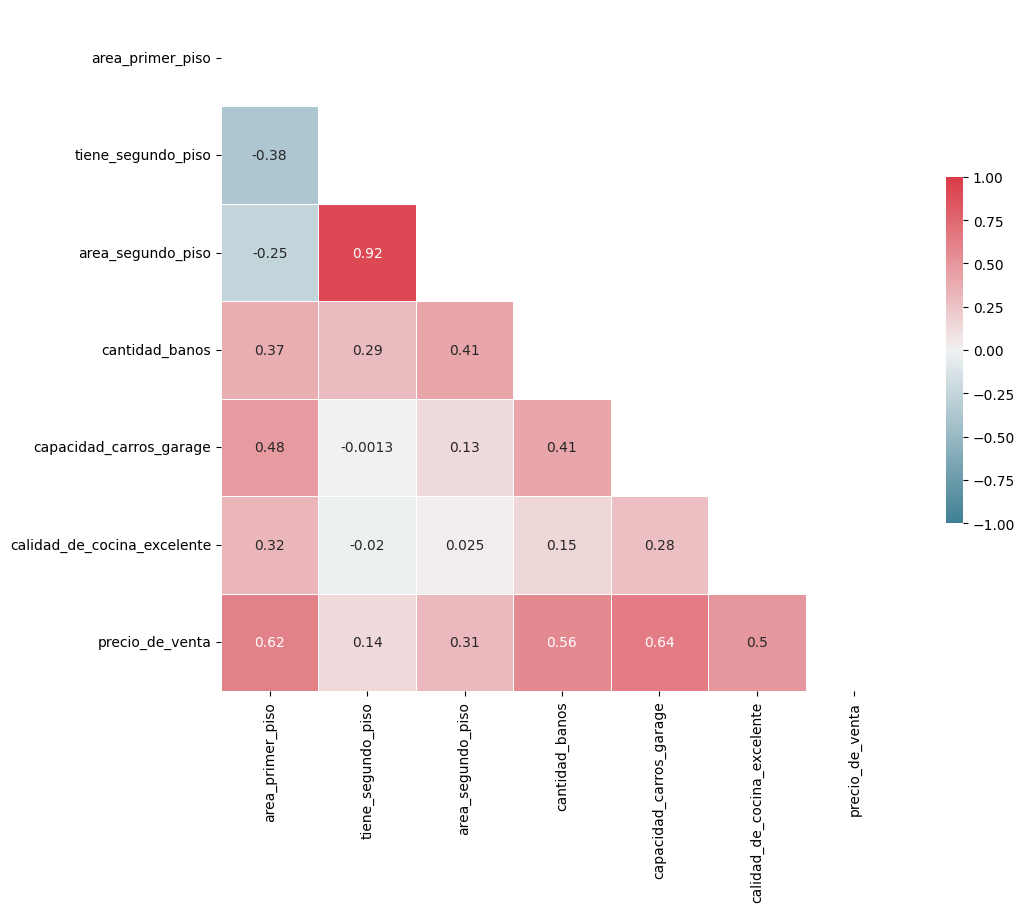

In [10]:
# Actividad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leyendo datos
datos = pd.read_csv(link)
datos = datos.drop(columns = "Id")

# Correlación
corr = datos.corr()

# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()


# Intensidad: se refiere a la fuerza de la relación entre las variables medidas. Puede variar de -1 a +1, donde -1 indica una correlación perfectamente negativa,
# +1 indica una correlación perfectamente positiva y 0 indica ausencia de correlación lineal.
# Dirección: se refiere a la naturaleza de la relación entre las variables medidas.
# Una correlación positiva indica que las variables aumentan o disminuyen juntas,
# mientras que una correlación negativa indica que una variable aumenta mientras la otra disminuye, o viceversa.
# Ejemplo:

# El coeficiente de correlación lineal entre el área del primer piso y el precio de venta es de 0.62,
# indicando una correlación positiva moderadamente fuerte (intensidad). En general, a medida que el área del primer
#  piso de una casa aumenta, el precio de venta también tiende a aumentar (dirección).

## Relacionando variables

In [11]:
# importando los paquetes para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

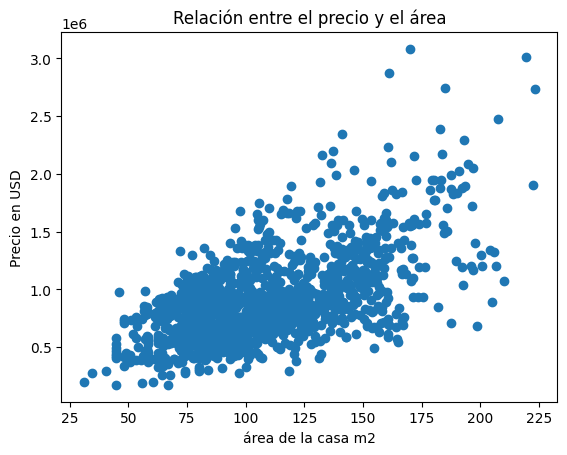

In [12]:
# Cómo se relacionan el área construída y el precio del inmueble?
plt.scatter(datos['area_primer_piso'], datos['precio_de_venta'])
plt.title ("Relación entre el precio y el área")
plt.xlabel("área de la casa m2")
plt.ylabel("Precio en USD")
plt.show()

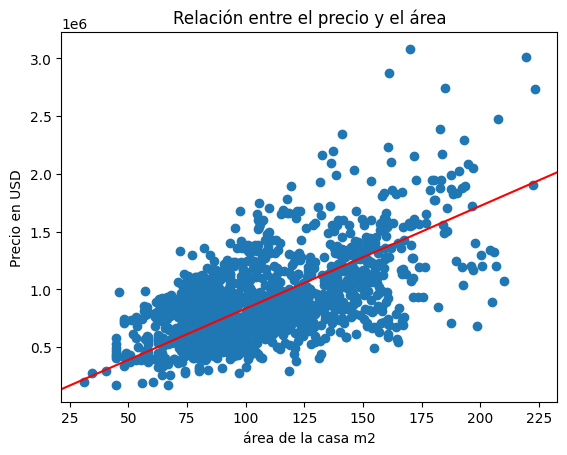

In [13]:
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.
# E si quisieramos trazar una línea que nos permita describir este comportamiento?
plt.scatter(datos['area_primer_piso'], datos['precio_de_venta'])
plt.axline(xy1=(40,300000), xy2=(175,1500000),color='red')
plt.title ("Relación entre el precio y el área")
plt.xlabel("área de la casa m2")
plt.ylabel("Precio en USD")
plt.show()


## Mejor recta

In [14]:
# Cuál es la recta que mejor se ajusta a esta relación
px.scatter(datos, x='area_primer_piso', y='precio_de_venta', trendline_color_override='red', trendline='ols' )

# 2. Explicando la recta
Ajustamos una recta entre los $m^2$ del primer piso y el precio de la casa. Queremos explicar el precio de la casa a partir de su tamaño, por eso decimos que:

* Variable explicativa/independiente: Área del primer piso  
* Variable de respuesta/dependiente: Precio de la casa  

/tmp/ipython-input-50-2268289415.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




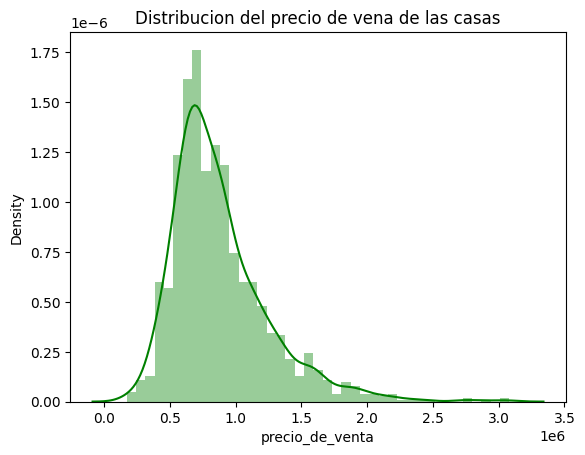

In [50]:
#Quién es nuestra variable de respuesta?
# x => area de la casa => variable independiente
# y = precio de la casa  => variable dependiente


sns.distplot(datos['precio_de_venta'], kde=True, color='green')
plt.title('Distribucion del precio de vena de las casas')
plt.show()


### Separando datos para entrenamiento y para prueba

El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

In [51]:
# import train_test_split
from sklearn.model_selection import train_test_split

y = datos['precio_de_venta']
X = datos.drop(columns='precio_de_venta')

#con el random_state estamos garantizando la reproductividad de la segregacion de los datos (que los datos no cambie, es una semilla)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230)


In [52]:
#Datos de entrenamiento para usar la fórmula
df_train = pd.DataFrame(X_train)
df_train['precio_de_venta'] = y_train

In [53]:
# import ols
from statsmodels.formula.api import ols

In [54]:
# ajustando el primer modelo
modelo_0 = ols('precio_de_venta ~ area_primer_piso', data=df_train).fit()

## Analizando los coeficientes

(intensidad, dirección y significancia)




In [20]:
# visualizando los parámetros


In [21]:
# El resumen del modelo


- El **punto de intercepción** es el valor esperado del precio de la casa cuando todas las demás variables son cero. En este caso, cuando todas las demás variables, incluida el área del primer piso, son cero, el precio esperado de la casa es de $145.196,40. No siempre se tiene una interpretación práctica para este número.

- El **efecto individual** del área es de \$6.833,97. Esto indica que por cada metro cuadrado adicional al área del primer piso, se espera que el precio de la casa aumente en promedio \$6.833,97.

<img src="https://i.ibb.co/CJwfMgW/coeficientes.png" alt="coeficientes" border="0">


## Explicabilidad del modelo

**¿En qué medida la variación del área explica los diversos precios de las casas?**  

En este caso, recurrimos a la métrica R², el coeficiente de determinación. El R² varía de 0 a 1, donde 1 indica un ajuste perfecto del modelo a los datos, es decir, todas las variaciones en la variable dependiente son explicadas por las variables independientes en el modelo. Por otro lado, un R² de 0 indica que el modelo no explica ninguna variabilidad en la variable dependiente.

In [22]:
# observando el R²


## Entendiendo el resíduo

In [23]:
# Quiénes son los residuos?


In [24]:
# Cómo están distribuidos


<img src="https://i.ibb.co/zGTB35V/residuos.png" alt="residuos" border="0">

## Obteniendo el R² de la previsión

In [25]:
# definiendo la 'Y' prevista


In [26]:
# importando el r2_score


In [27]:
# mostrando el resultado de r²


# 3. Añadiendo otras características

El modelo con un solo factor nos mostró un R² de 0.38, es decir, aproximadamente el 38% de la variación observada en los precios de las casas puede explicarse por la variación en el área.  
Esto indica que aún existe una cantidad significativa de variación que no está siendo capturada por este modelo específico. Analizaremos otros factores para explicar el precio de las casas.

## Analizando los factores

In [28]:
# cuáles otras características podrían explicar el precio de los inmuebles?


In [29]:
#Vamos a analizar solamente y_vars='precio_de_venta'


## Añadiendo factores al modelo

In [30]:
# importando la api de statsmodels


In [31]:
# Añadiendo una constante


In [32]:
# Creando el modelo de regresión (con todas las variables): saturado


In [33]:
# Modelo sin el área del segundo piso


In [34]:
# Modelo sin la información del garage
# Modelo sin el área del segundo piso


In [35]:
# Resumen del modelos


## Comparando los modelos
Cuál es el modelo?


In [36]:
# Cuántos parámetros tiene el modelo?


# 4. Precificando las casas

## Obteniendo el R² de la previsión

In [37]:
# Añadiendo una constante en X_test


In [38]:
# Previsión con el modelo 3


In [39]:
# Cuál es el r² de la previsión?


In [40]:
# Cuál es el R² del entrenamiento?


## Precificando una casa

<img src="https://i.ibb.co/SvG4V4j/costo.png" alt="costo" border="0">

In [41]:
#Nuevo inmueble


In [42]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0?


In [43]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?


## Precificando varias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [44]:
# Leyendo varias casas?


In [45]:
# Añadiendo una constante


In [46]:
# Cuál es el precio de estas nuevas casas?
# precio_casas = pd.DataFrame()


# 5. Investigando el modelo





## Multicolinearidad

Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [47]:
# importar el VIF de statsmodel


In [48]:
# VIF 1


In [49]:
# VIF 3


## Análisis de los residuos

Residuos: la discrepancia entre los valores reales y los valores que el modelo predice para los mismos puntos de datos.

<img src="https://i.ibb.co/9bmySbm/heterocedasticidad.png" alt="heterocedasticidad" border="0">